# Yield Prediction using Molecular Fingerprints_Morgan_Condensation_reactions

Found this dataset from a recent publication by a D.M. Makarov et al. (Journal of Computational Science 74 (2023) 102173) (https://doi.org/10.1016/j.jocs.2023.102173)

"""We considered pyrrole or dipyrromethane condensation reactions with various aldehydes, resulting in the production of boron(III) dipyrromethene or BODIPY (681 records). These reactions were retrieved from articles (see “Dataset reactions” and Scheme S1). Addi tionally, we used the reactions of the production of dipyrromethane (111 records) and porphyrins (457 records). All condensation reactions for dipyrromethanes and 213 reactions for porphyrins with various al dehydes were obtained in our laboratory. The remaining 244 reactions for the porphyrins synthesis were obtained from articles (see “Dataset reactions”). Our experimental dataset is based on a study of pyrrole condensation processes with aldehydes, using catalytic amounts of organic acids to produce ms-aryl- and ß-alkyl-substituted dipyrro methanes. """

The objective of this notebook is to introduce a method for predicting yield

As a beginner, there may be numerous opportunities for improvement in this notebook. I was largely inspired by the work of D.M. Makarov et al and the STEPHEN LEE's notebook (BELKA: Molecule Representations for ML Tutorial) thanks to them.

## Data

In [72]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_row', 211)
pd.set_option('display.max_columns',211)

In [3]:
# Téléchargement du Dataset 
DataFrame = r"C:\Users\loris\Desktop\IA_chemistry\Dipyrromethanes_condensation_reactions-main\Condensation_reactions - Copie.xlsx"

df = pd.read_excel(DataFrame)

df= df.copy()

print(df.shape)
df.head()

(1249, 4)


,SMILES,yield,Temperature,Ind
0,CC(C)(C)c1ccc(OCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C=...,0.05,20,78
1,O=Cc1ccccc1OCCOC(=O)C#CC(=O)OCCOc1ccccc1C=O.c1...,1.00,40,909
2,c1cc[nH]c1.Cc1cc(C)c(C=O)c(C)c1.COC(=O)c1ccc(C...,2.00,20,747
3,CC(C)(C)c1ccc(OCCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C...,2.10,20,77
4,Cc1ccc(-c2ccccc2C=O)cc1.Fc1c(F)c(F)c(C(c2ccc[n...,2.50,25,266


## Missing values

In [4]:
# Recherche des valeurs manquantes
missing_values = df.isnull().sum()
missing_values

SMILES         0
yield          0
Temperature    0
Ind            0
dtype: int64

## Target

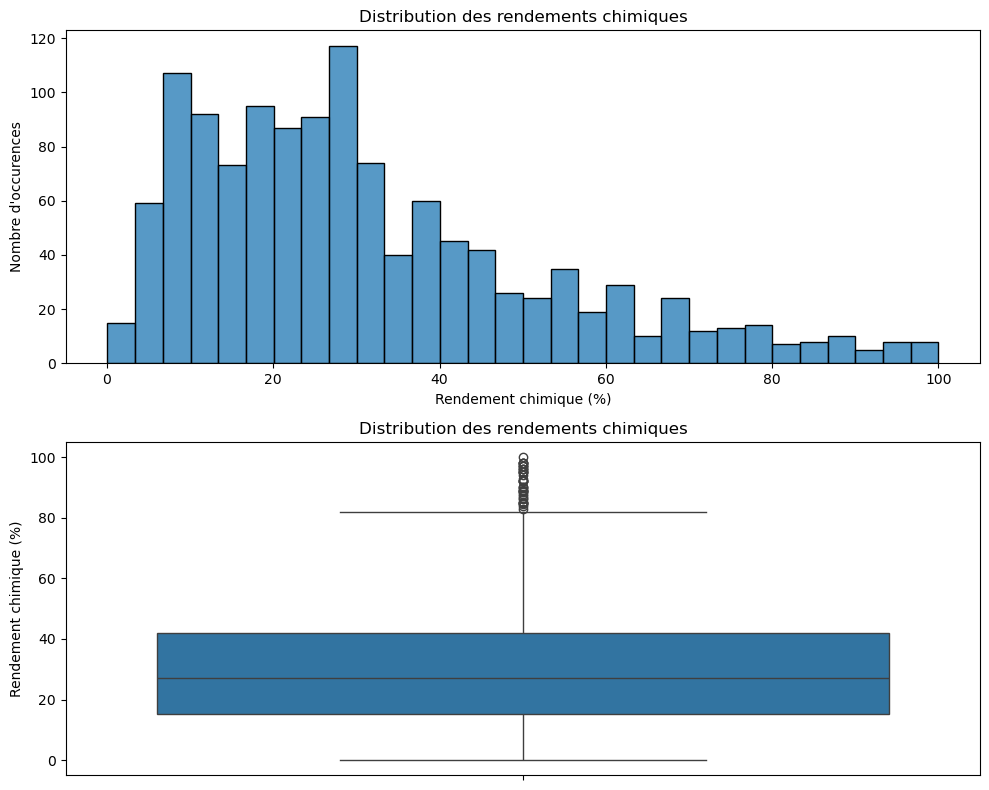

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création de la figure et des axes pour les subplots
fig, axs = plt.subplots(2, 1, figsize=(10,8))

# Tracé de l'histogramme sur le premier subplot
sns.histplot(data=df, x='yield', bins=30, ax=axs[0])
axs[0].set_xlabel('Rendement chimique (%)')
axs[0].set_ylabel("Nombre d'occurences")
axs[0].set_title("Distribution des rendements chimiques")

# Tracé du boxplot sur le deuxième subplot
sns.boxplot(df["yield"], ax=axs[1])
axs[1].set_ylabel("Rendement chimique (%)")
axs[1].set_title("Distribution des rendements chimiques")

# Ajustement de l'espacement entre les subplots
plt.tight_layout()

# Affichage des graphiques 
plt.show()

## Obtenir des Mols

In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [7]:
# Change le '>>' par '.', pour obtenir des Mols
def change_smile(df, columns_names):
    df['SMILES_2'] = df[columns_names].replace('>>', '.', regex=True)
    return df

In [8]:
# Transforme le SMILE en Mols
def Mols(df, columns_names):
    df["mols"] = pd.Series(df[columns_names]).apply(Chem.MolFromSmiles)
    return df

In [9]:
# Change le '>>' par '.', pour obtenir des Mols
df = change_smile(df, "SMILES")

In [10]:
# Transforme le SMILE en Mols
df = Mols(df, "SMILES_2")

[12:10:51] Explicit valence for atom # 26 H, 2, is greater than permitted
[12:10:51] Explicit valence for atom # 26 H, 2, is greater than permitted
[12:10:52] Explicit valence for atom # 0 O, 3, is greater than permitted
[12:10:52] Explicit valence for atom # 10 O, 3, is greater than permitted


### Enlève les dernières valeurs manquantes 

In [11]:
df.isnull().sum()

SMILES         0
yield          0
Temperature    0
Ind            0
SMILES_2       0
mols           4
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

SMILES         0
yield          0
Temperature    0
Ind            0
SMILES_2       0
mols           0
dtype: int64

## 🗝️ Molecular Fingerprints

Molecular fingerprints are fixed-length numerical representations that encode molecular structures, usually as a binary vector. Each element (called a bit) of a fingerprint vector represents the presence of specific atomic or structural features within the chemical compound.

Below is example code to generate two types of commonly used molecular fingerprints:

MACCS Keys: a 166-bit fingerprint based on a predefined list of molecular substructures or patterns

Morgan Fingerprints: a fixed-length bit fingerprint based on hashed topological features of atoms and their bond connectivities within a specified radius. Also referred to as Extended-Connectivity Fingerprints (ECFPs)

In [18]:
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import pandas as pd

In [19]:
mols = df["mols"]

In [21]:
# generate Morgan Fingerprints from RDKit Mol objects as a dataframe
mfpt_list = [AllChem.GetMorganFingerprintAsBitVect(mol, radius=3, nBits=2048) for mol in mols]

mfpt_df = pd.DataFrame([list(fpt) for fpt in mfpt_list])

mfpt_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,...,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Note that different values can be specified for radius and nBits when generating Morgan Fingerprints.

    radius: number of bond steps to include from each atom when calculating the fingerprint. A radius of 1 means that only the immediate neighbors are considered; a radius of 2 includes neighbors up to two bonds away, etc. 

    nBits: total number of bits in the fingerprint (i.e. resolution). Larger nBits values increases feature dimensionality and typically increases feature sparsity.
    
Bit Collision refers to the scenario where different substructural features are mapped to the same bit position. This is undesirable as it reduces the fingerprint's ability to differentiate molecules. Increasing nBits increases the available feature space and thus lowers the chance of bit collisions.

In [22]:
mfpt_df.shape

(1245, 2048)

In [23]:
df.shape

(1245, 6)

In [24]:
df_1 = pd.concat([df, mfpt_df], axis=1)

In [35]:
df_1.isna().sum().max()

4

In [37]:
df_1.dropna(inplace=True)

In [38]:
df_1.isna().sum().max()

0

In [39]:
df_1.shape

(1241, 2054)

In [40]:
df_1.head()

,SMILES,yield,Temperature,Ind,SMILES_2,mols,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,...,1943,1944,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CC(C)(C)c1ccc(OCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C=...,0.05,20.0,78.0,CC(C)(C)c1ccc(OCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C=...,<rdkit.Chem.rdchem.Mol object at 0x0000028CF1F...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,O=Cc1ccccc1OCCOC(=O)C#CC(=O)OCCOc1ccccc1C=O.c1...,1.00,40.0,909.0,O=Cc1ccccc1OCCOC(=O)C#CC(=O)OCCOc1ccccc1C=O.c1...,<rdkit.Chem.rdchem.Mol object at 0x0000028CF1F...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,c1cc[nH]c1.Cc1cc(C)c(C=O)c(C)c1.COC(=O)c1ccc(C...,2.00,20.0,747.0,c1cc[nH]c1.Cc1cc(C)c(C=O)c(C)c1.COC(=O)c1ccc(C...,<rdkit.Chem.rdchem.Mol object at 0x0000028CF1F...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CC(C)(C)c1ccc(OCCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C...,2.10,20.0,77.0,CC(C)(C)c1ccc(OCCCCCOc2ccc(C(C)(C)C)cc2C=O)c(C...,<rdkit.Chem.rdchem.Mol object at 0x0000028CF1F...,0.0,1.0,1.

## Model 

In [59]:
from tqdm import tqdm
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statistics import mean, stdev

In [60]:
X=df_1.drop(["SMILES", "SMILES_2", "yield", "Ind", "mols"], axis=1)
y=df_1['yield']

In [61]:
X.shape

(1241, 2049)

In [62]:
y.shape

(1241,)

### Model_random_forest_regression

In [63]:
def random_forest_regression(X, y):
    rmse_scores = []
    r2_scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model = RandomForestRegressor(n_estimators=120, max_depth=25)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        #print(f"Iteration {i}: RMSE = {rmse:.3f}, R^2  = {r2:.3f}")
    # Retourner la moyenne et l'écart-type des scores
    return mean(rmse_scores), stdev(rmse_scores), mean(r2_scores), stdev(r2_scores)
    
    print("\nAverage performance of test set at 10 split")
    print("Metric\tavg\tstdev")
    print("R^2\t%.2f\t%.2f" % (mean(r2_scores), stdev(r2_scores)))
    print("RMSE\t%.2f\t%.2f" % (mean(rmse_scores), stdev(rmse_scores)))

In [64]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statistics import mean, stdev

def statistics_for_the_training_set_with_5CV_RFR(X, y):
    r2_scores = []
    rmse_scores = []
    
    for i in range(10):
        X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.2, random_state=i)
        X_tr.reset_index(drop=True, inplace=True)
        y_tr.reset_index(drop=True, inplace=True)
        
        cv = KFold(n_splits=5, shuffle=True, random_state=1)
        fold_r2_scores = []
        fold_rmse_scores = []
        
        for train_index, test_index in cv.split(X_tr):
            X_train, X_test = X_tr.loc[train_index].values, X_tr.loc[test_index].values
            y_train, y_test = y_tr.loc[train_index].values, y_tr.loc[test_index].values
            
            model = RandomForestRegressor(n_estimators=120, max_depth=25)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            fold_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            fold_r2_scores.append(r2_score(y_test, y_pred))
        
        # Moyennes et écarts-types des scores pour chaque pli
        rmse_scores.append(mean(fold_rmse_scores))
        r2_scores.append(mean(fold_r2_scores))
    
    return mean(rmse_scores), stdev(rmse_scores), mean(r2_scores), stdev(r2_scores)


### Model CatBoost

In [65]:
# Importer CatBoost après l'installation
import catboost

In [66]:
def catboost_regression(X, y):
    rmse_scores = []
    r2_scores = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model = catboost.CatBoostRegressor(learning_rate=0.02, l2_leaf_reg=9.5, depth=7, silent=True)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        rmse_scores.append(rmse)
        r2 = r2_score(y_test, y_pred)
        r2_scores.append(r2)
        #print(f"Iteration {i}: RMSE = {rmse:.3f}, R2 = {r2:.3f}")
    
    # Retourner la moyenne et l'écart-type des scores
    return mean(rmse_scores), stdev(rmse_scores), mean(r2_scores), stdev(r2_scores)
    
    print("\nAverage performance of test set at 10 split")
    print("Metric\tavg\tstdev")
    print("R^2\t%.2f\t%.2f" % (mean(r2_scores), stdev(r2_scores)))
    print("RMSE\t%.2f\t%.2f" % (mean(rmse_scores), stdev(rmse_scores)))

In [67]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from statistics import mean, stdev

def statistics_for_the_training_set_with_5CV_catBoost(X, y):
    r2_scores = []
    rmse_scores = []
    
    for i in range(10):
        X_tr, X_t, y_tr, y_t = train_test_split(X, y, test_size=0.2, random_state=i)
        X_tr.reset_index(drop=True, inplace=True)
        y_tr.reset_index(drop=True, inplace=True)
        
        cv = KFold(n_splits=5, shuffle=True, random_state=1)
        fold_r2_scores = []
        fold_rmse_scores = []
        
        for train_index, test_index in cv.split(X_tr):
            X_train, X_test = X_tr.loc[train_index].values, X_tr.loc[test_index].values
            y_train, y_test = y_tr.loc[train_index].values, y_tr.loc[test_index].values
            
            model = catboost.CatBoostRegressor(learning_rate=0.02, l2_leaf_reg=9.5, depth=7, silent=True)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            
            fold_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
            fold_r2_scores.append(r2_score(y_test, y_pred))
        
        # Moyennes et écarts-types des scores pour chaque pli
        rmse_scores.append(mean(fold_rmse_scores))
        r2_scores.append(mean(fold_r2_scores))
    
    return mean(rmse_scores), stdev(rmse_scores), mean(r2_scores), stdev(r2_scores)


## Result Model

In [68]:
import time
import pandas as pd
from tqdm import tqdm

def run_and_compare_models(X, y):
    models = {
        "Random_Forest": random_forest_regression,
        "Random_Forest_Kfold": statistics_for_the_training_set_with_5CV_RFR,
        "CatBoost": catboost_regression,
        "CatBoostKflod": statistics_for_the_training_set_with_5CV_catBoost
    }
    
    results = []
    
    for model_name, model_func in tqdm(models.items(), desc="Running models"):
        start_time = time.time()
        rmse_avg, rmse_std, r2_avg, r2_std = model_func(X, y)
        end_time = time.time()  # Arrêter le chronomètre
        elapsed_time = end_time - start_time
        results.append({
            "Model": model_name,
            "RMSE Avg": rmse_avg,
            "RMSE Std": rmse_std,
            "R^2 Avg": r2_avg,
            "R^2 Std": r2_std,
            "Time (s)": elapsed_time  # Ajouter le temps écoulé à chaque entrée
        })
        
    results_df = pd.DataFrame(results)
    return results_df

In [70]:
X.columns = X.columns.astype(str)

In [73]:
results_df_ = run_and_compare_models(X, y)

Running models: 100%|██████████| 4/4 [14:59<00:00, 224.91s/it]


In [74]:
results_df_

,Model,RMSE Avg,RMSE Std,R^2 Avg,R^2 Std,Time (s)
0,Random_Forest,13.223052,0.736384,0.588146,0.050911,68.658887
1,Random_Forest_Kfold,13.582734,0.298427,0.579330,0.019495,267.485465
2,CatBoost,13.575072,0.794473,0.565656,0.057480,92.542989
3,CatBoostKflod,13.688731,0.235878,0.573253,0.015757,470.963685


In [75]:
# Sauvegarde du DataFrame dans un fichier CSV
results_df_.to_csv("Resultat_Df_MorganFingerprint.csv")